# Imports

In [1]:
#Imports de base
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import du fichier à analyser
PA75016_df = pd.read_csv('../data/pollution/2_Processed/PA75016.csv').copy()
PA75016_df = PA75016_df[:-25]
PA75016_df

,Date_time,PM25,PM10,NO2,O3,SO2,Station_name,Station_type
0,2018/01/01 01:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
1,2018/01/01 02:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
2,2018/01/01 03:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
3,2018/01/01 04:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
4,2018/01/01 05:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
...,...,...,...,...,...,...,...,...
42546,2022/11/13 19:00:00+00,18.5,18.2,35.4,NaN,NaN,75016 - Porte Auteuil,Traffic
42547,2022/11/13 20:00:00+00,18.8,21.8,29.6,NaN,NaN,75016 - Porte Auteuil,Traffic
42548,2022/11/13 21:00:00+00,19.4,29.9,32.1,NaN,NaN,75016 - Porte Auteuil,Traffic
42549,2022/11/13 22:00:00+00,22.8,23.2,29.4,NaN,NaN,75016 - Porte Auteuil,Traffic


# EDA

In [3]:
from workflow.utils import analyse_df

In [4]:
#Analyse du fichier PA75016
analyse_df(PA75016_df)

General Info:
42551 Rows 8 Columns
0 Duplicated Rows
Memory Usage: 2.60Mb

Columns float64: ['PM25', 'PM10', 'NO2', 'O3', 'SO2']

Columns object: ['Date_time', 'Station_name', 'Station_type']


,PM25,PM10,NO2,O3,SO2
count,41229.000000,41405.000000,40738.000000,0.0,25444.000000
mean,15.098152,33.391631,73.241266,NaN,1.309079
std,8.906364,17.560687,29.101300,NaN,1.363716
min,0.000000,0.400000,5.100000,NaN,0.000000
25%,9.200000,21.100000,53.500000,NaN,0.200000
50%,13.000000,29.900000,71.100000,NaN,1.000000
75%,18.400000,41.800000,90.300000,NaN,2.000000
max,193.000000,253.000000,286.000000,NaN,75.900000



Cheking Missing Values:
Column "PM25" has 1322 missing values (3.11%)
Column "PM10" has 1146 missing values (2.69%)
Column "NO2" has 1813 missing values (4.26%)
Column "O3" has 42551 missing values (100.00%)
Column "SO2" has 17107 missing values (40.20%)

Checking Linear Correlation:
Linear Correlation found between columns PM10 and PM25 -> Pearson coef. = 0.78


/Users/llm/code/TheLab75/ParisDeepAirProject/workflow/utils.py:82: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr() # Correlation DataFrame


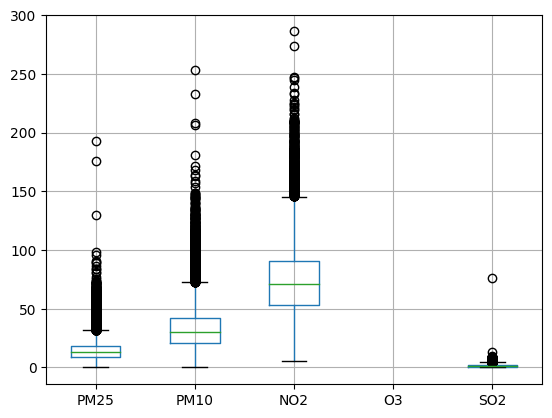

In [5]:
PA75016_df.boxplot();

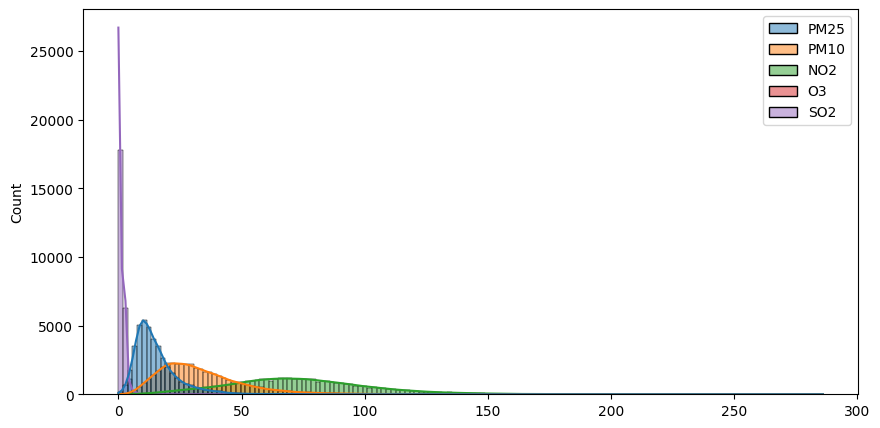

In [6]:
plt.figure(figsize=(10,5))
sns.histplot(data=PA75016_df,kde=True,bins=150)
plt.show()

## Conlusion de l'EDA

Synthèse de l'EDA sur la station PA75016:
- De 2018 à 2022, la part de NaN est faible pour les polluants suivants : PM25, PM10 & NO2 (<6% de NaN) --> **À garder.**
- Concernnant le SO2, la part de NaN est faible, progresse à partir de 2020, pour exploser en 2021, et atteindre 100% en 2022. -->  **À dropper.**
- Concernant l'O3, le nombre de NaN est à 100% de 2018 à 2022 --> **À dropper.**

# Preprocessing

In [7]:
## Drop des colonnes avec beaucoup de Nan
PA75016_df = PA75016_df.drop(columns=['O3', 'SO2', 'Station_name', 'Station_type'])
PA75016_df

,Date_time,PM25,PM10,NO2
0,2018/01/01 01:00:00+00,NaN,NaN,NaN
1,2018/01/01 02:00:00+00,NaN,NaN,NaN
2,2018/01/01 03:00:00+00,NaN,NaN,NaN
3,2018/01/01 04:00:00+00,NaN,NaN,NaN
4,2018/01/01 05:00:00+00,NaN,NaN,NaN
...,...,...,...,...
42546,2022/11/13 19:00:00+00,18.5,18.2,35.4
42547,2022/11/13 20:00:00+00,18.8,21.8,29.6
42548,2022/11/13 21:00:00+00,19.4,29.9,32.1
42549,2022/11/13 22:00:00+00,22.8,23.2,29.4


## X & y - SimpleImputer

In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

num_features_normal = ['NO2']
num_features_skewed = ['PM25','PM10']

num_imputer_normal = make_pipeline(
    SimpleImputer(strategy='median'))

num_imputer_skewed = make_pipeline(
    SimpleImputer(strategy='median'))

preprocessor_imputer = make_column_transformer(
    (num_imputer_normal, num_features_normal),
    (num_imputer_skewed, num_features_skewed))

preprocessor_imputer

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['NO2']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['PM25', 'PM10'])])

In [9]:
PA75016_preprocessed = pd.DataFrame(preprocessor_imputer.fit_transform(PA75016_df))

In [10]:
PA75016_preprocessed = PA75016_preprocessed.rename(columns={0:"PM25",1:"PM10",2:"NO2"})
PA75016_preprocessed = PA75016_preprocessed.set_index(PA75016_df['Date_time'])

In [11]:
PA75016_preprocessed

,PM25,PM10,NO2
Date_time,,,
2018/01/01 01:00:00+00,71.1,13.0,29.9
2018/01/01 02:00:00+00,71.1,13.0,29.9
2018/01/01 03:00:00+00,71.1,13.0,29.9
2018/01/01 04:00:00+00,71.1,13.0,29.9
2018/01/01 05:00:00+00,71.1,13.0,29.9
...,...,...,...
2022/11/13 19:00:00+00,35.4,18.5,18.2
2022/11/13 20:00:00+00,29.6,18.8,21.8
2022/11/13 21:00:00+00,32.1,19.4,29.9


In [12]:
PA75016_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42551 entries, 2018/01/01 01:00:00+00 to 2022/11/13 23:00:00+00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM25    42551 non-null  float64
 1   PM10    42551 non-null  float64
 2   NO2     42551 non-null  float64
dtypes: float64(3)
memory usage: 1.3+ MB


## X & y - Passer Date_time d'un step horaire à un step journalier

In [13]:
from workflow.daily_basis import mean_max_categorial

PA75016_daily = mean_max_categorial(PA75016_preprocessed)

In [14]:
PA75016_daily

,Date_time,PM25,PM10,NO2
0,2018/01/01,71.10,13.00,29.9
1,2018/01/02,71.10,13.00,29.9
2,2018/01/03,71.10,13.00,29.9
3,2018/01/04,71.10,13.00,29.9
4,2018/01/05,71.10,12.83,36.2
...,...,...,...,...
1770,2022/11/09,57.41,9.46,36.0
1771,2022/11/10,55.69,13.10,42.8
1772,2022/11/11,35.26,10.79,25.7
1773,2022/11/12,49.01,23.87,82.2


## Obtenir y

In [15]:
from workflow.calcul_ATMO import general_categorical

PA75016_daily_cat = PA75016_daily.copy()
PA75016_daily_cat = general_categorical(PA75016_daily_cat)
PA75016_daily_cat

,Date_time,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical
0,2018/01/01,71.10,13.00,29.9,4,0,0
1,2018/01/02,71.10,13.00,29.9,4,0,0
2,2018/01/03,71.10,13.00,29.9,4,0,0
3,2018/01/04,71.10,13.00,29.9,4,0,0
4,2018/01/05,71.10,12.83,36.2,4,0,0
...,...,...,...,...,...,...,...
1770,2022/11/09,57.41,9.46,36.0,4,0,0
1771,2022/11/10,55.69,13.10,42.8,4,0,1
1772,2022/11/11,35.26,10.79,25.7,3,0,0
1773,2022/11/12,49.01,23.87,82.2,3,1,1


In [16]:
from workflow.calcul_ATMO import calcul_ATMO

PA75016_daily_cat = calcul_ATMO(PA75016_daily_cat)

In [17]:
PA75016_daily_cat

,Date_time,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO
0,2018/01/01,71.10,13.00,29.9,4,0,0,4
1,2018/01/02,71.10,13.00,29.9,4,0,0,4
2,2018/01/03,71.10,13.00,29.9,4,0,0,4
3,2018/01/04,71.10,13.00,29.9,4,0,0,4
4,2018/01/05,71.10,12.83,36.2,4,0,0,4
...,...,...,...,...,...,...,...,...
1770,2022/11/09,57.41,9.46,36.0,4,0,0,4
1771,2022/11/10,55.69,13.10,42.8,4,0,1,4
1772,2022/11/11,35.26,10.79,25.7,3,0,0,3
1773,2022/11/12,49.01,23.87,82.2,3,1,1,3


In [18]:
y = PA75016_daily_cat[['Date_time','ATMO']]
y.set_index(y['Date_time'],inplace=True)
y= y[['ATMO']]

In [19]:
y

,ATMO
Date_time,
2018/01/01,4
2018/01/02,4
2018/01/03,4
2018/01/04,4
2018/01/05,4
...,...
2022/11/09,4
2022/11/10,4
2022/11/11,3


In [20]:
y.to_csv('../data/pollution/inputs/y.csv', index=False)

## Obtenir X

In [26]:
X = PA75016_daily.copy()
X.set_index(X['Date_time'],inplace=True)
X = X.drop(columns='Date_time')
X

,PM25,PM10,NO2
Date_time,,,
2018/01/01,71.10,13.00,29.9
2018/01/02,71.10,13.00,29.9
2018/01/03,71.10,13.00,29.9
2018/01/04,71.10,13.00,29.9
2018/01/05,71.10,12.83,36.2
...,...,...,...
2022/11/09,57.41,9.46,36.0
2022/11/10,55.69,13.10,42.8
2022/11/11,35.26,10.79,25.7


In [27]:
#Créer un pipeline avec un Robust Scaler
from sklearn.preprocessing import RobustScaler

preprocessor_scaler = make_pipeline(
    RobustScaler())

preprocessor_scaler

Pipeline(steps=[('robustscaler', RobustScaler())])

In [28]:
X = pd.DataFrame(preprocessor_scaler.fit_transform(X))

In [29]:
X

,0,1,2
0,0.000000,-0.001422,-0.732394
1,0.000000,-0.001422,-0.732394
2,0.000000,-0.001422,-0.732394
3,0.000000,-0.001422,-0.732394
4,0.000000,-0.025605,-0.510563
...,...,...,...
1770,-0.562911,-0.504979,-0.517606
1771,-0.633635,0.012802,-0.278169
1772,-1.473684,-0.315789,-0.880282
1773,-0.908306,1.544808,1.109155


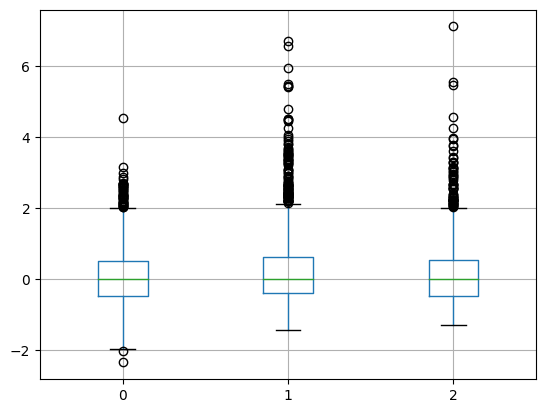

In [31]:
X.boxplot();
plt.show()

In [32]:
X.to_csv('../data/pollution/inputs/X.csv', index=False)